In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [2]:
mushrooms = pd.read_csv('mushrooms.csv')

In [3]:
mushrooms

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in mushrooms.columns:
    mushrooms[i]=le.fit_transform(mushrooms[i])

In [5]:
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [6]:
mushrooms.drop(['veil-type'], axis = 1, inplace = True)

In [7]:
mushrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int32
 1   cap-shape                 8124 non-null   int32
 2   cap-surface               8124 non-null   int32
 3   cap-color                 8124 non-null   int32
 4   bruises                   8124 non-null   int32
 5   odor                      8124 non-null   int32
 6   gill-attachment           8124 non-null   int32
 7   gill-spacing              8124 non-null   int32
 8   gill-size                 8124 non-null   int32
 9   gill-color                8124 non-null   int32
 10  stalk-shape               8124 non-null   int32
 11  stalk-root                8124 non-null   int32
 12  stalk-surface-above-ring  8124 non-null   int32
 13  stalk-surface-below-ring  8124 non-null   int32
 14  stalk-color-above-ring    8124 non-null 

<AxesSubplot:xlabel='class', ylabel='count'>

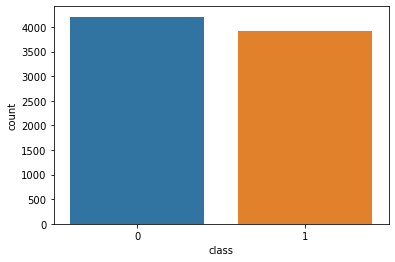

In [8]:
sns.countplot(x = 'class',data = mushrooms)

<AxesSubplot:>

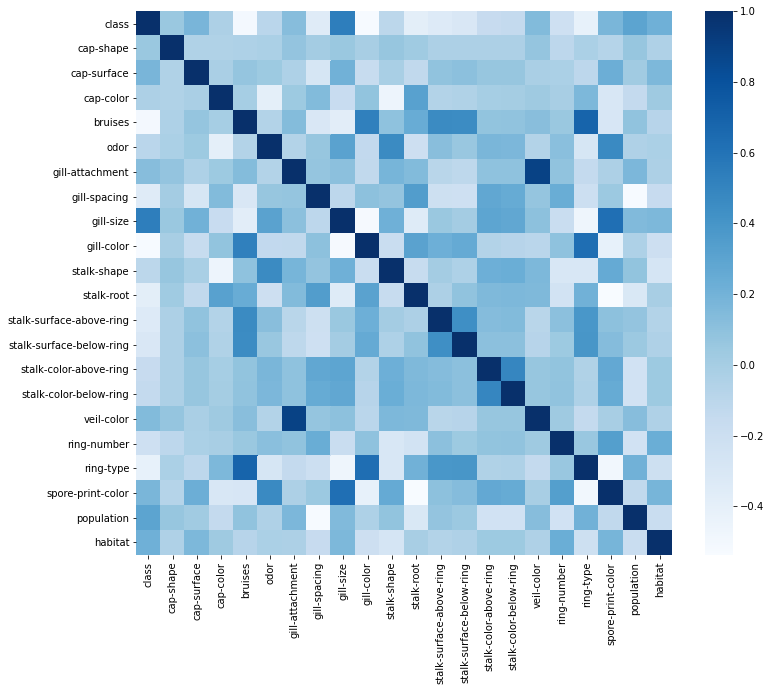

In [9]:
plt.figure(figsize=(12,10))
sns.heatmap(mushrooms.corr(), cmap='Blues')

In [10]:
x = mushrooms.drop(['class'],axis=1)

In [11]:
y = mushrooms['class']

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
rf = RandomForestClassifier(n_estimators = 60, criterion = 'entropy',random_state = 0)

In [16]:
model= rf.fit(x_train,y_train)

In [17]:
model

RandomForestClassifier(criterion='entropy', n_estimators=60, random_state=0)

In [18]:
y_pred=model.predict(x_test)

In [19]:
y_pred

array([1, 0, 0, ..., 1, 1, 1])

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
accuracy = accuracy_score(y_test,y_pred)*100
accuracy

100.0

In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
matrix = confusion_matrix(y_test,y_pred)
matrix

array([[1272,    0],
       [   0, 1166]], dtype=int64)

##End of random forest

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
logi = LogisticRegression()

In [26]:
model2 = logi.fit(x_train,y_train)
model2

C:\Users\Shree\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
y_pred2 = model2.predict(x_test)

In [28]:
accuracy2 = accuracy_score(y_test,y_pred2)*100
accuracy2

94.91386382280558

In [29]:
matrix2 = confusion_matrix(y_test,y_pred2)
matrix2

array([[1222,   50],
       [  74, 1092]], dtype=int64)

##End of logistic regression

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
dt = DecisionTreeClassifier(criterion = 'entropy')

In [32]:
model3= dt.fit(x_train,y_train)
model3

DecisionTreeClassifier(criterion='entropy')

In [33]:
y_pred3 = model3.predict(x_test)
y_pred3

array([1, 0, 0, ..., 1, 1, 1])

In [34]:
accuracy3 = accuracy_score(y_test, y_pred3)*100
accuracy3

100.0

In [35]:
matrix3 = confusion_matrix(y_test, y_pred3)
matrix3

array([[1272,    0],
       [   0, 1166]], dtype=int64)

##End of Decision tree

In [36]:
from sklearn.pipeline import Pipeline

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [38]:
pipe_log = Pipeline([('Logistic',LogisticRegression())])
                       

In [39]:
pipe_rf = Pipeline([('randforest',RandomForestClassifier())])

In [40]:
pipe_dt = Pipeline([('dt',DecisionTreeClassifier())])

In [41]:
pipelines = [pipe_log, pipe_rf, pipe_dt]

In [42]:
best_accuracy=0
best_classifier = 0
best_pipeline=""

In [43]:
#dict of pipelines
pipe_dict={0:LogisticRegression,1:RandomForestClassifier,2:DecisionTreeClassifier}

In [44]:
#fitting pipelines
for pipe in pipelines:
    pipe.fit(x_train,y_train)

C:\Users\Shree\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
for i,model in enumerate(pipelines):
    print("{} test accuracy: {}".format(pipe_dict[i],model.score(x_test,y_test)))

<class 'sklearn.linear_model._logistic.LogisticRegression'> test accuracy: 0.9491386382280558
<class 'sklearn.ensemble._forest.RandomForestClassifier'> test accuracy: 1.0
<class 'sklearn.tree._classes.DecisionTreeClassifier'> test accuracy: 1.0


In [46]:
best_accuracy=0
best_classifier = 0
best_pipeline=""
for i,model in enumerate(pipelines):
    if model.score(x_test,y_test)>best_accuracy:
        best_accuracy=model.score(x_test,y_test)
        best_pipeline=model
        best_classifier=i
print("best model {}".format(pipe_dict[best_classifier]))
        

best model <class 'sklearn.ensemble._forest.RandomForestClassifier'>
